

# Abstract

This blog post explores the process of building a machine learning classifier using the Palmer Penguins dataset. The analysis focuses on the identification of key features and the construction of a Random Forest model to classify penguin species based on various measurements. Through data preparation, feature engineering, and model training, we assess how well different combinations of features influence the classifier's performance. The results reveal that a perfect accuracy of 100% can be achieved, with decision region plots visualizing the classifier's ability to distinguish between species and sexes. The findings highlight the significant impact of feature selection and the effectiveness of Random Forest classifiers in this scenario.


Acess the training data and test data 

In [118]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()

test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

# Data Preparation
You ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍will ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍need to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍prepare ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍ ‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍qualitative ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍columns ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍in ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Categorical ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍feature ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍columns ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍like ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Sex ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Island ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍should ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍be ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍converted ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍into ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍so-called ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍“one-hot ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍encoded” ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍0-1 ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍columns ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍using ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍pd.get_dummies ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍function. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍The ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍label ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍column ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Species ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍should ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍be ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍coded ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍differently, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍using ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍LabelEncoder. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍The ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍following ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍function ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍handles ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍this ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍work ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍for ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍you.

In [97]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

X_test, y_test = prepare_data(test)

# Summary table

The following code processes the "Species" column of a train DataFrame by splitting any compound species names and extracting only the first word (e.g., "Adelie" from "Adelie Penguin"). It then creates a new DataFrame df that includes only the relevant columns: "Body Mass (g)", "Island", and "Species". Next, it groups the data by both "Species" and "Island" to compute three statistics for the "Body Mass (g)" column: the mean, median, and count of observations. This aggregation provides a summary table that reveals the average body mass (mean), the middle value (median), and the number of penguin observations (count) for each species on each island, allowing for a clear comparison of body mass distributions across different species and locations. 

Based on the summary statistics provided, it’s clear that only Adelie penguins are found on all three islands, while Chinstrap and Gentoo penguins are restricted to only specific islands - Dream and Biscoe respectively. Adelie species data reveals that living on different islands has a negligible impact on body mass as mean and median body mass values for Adelie penguins are almost identical across the three islands. In contrast, Chinstrap penguins on Dream Island have a mean body mass of around 3743g, and Gentoo penguins on Biscoe Island have a much higher mean of 5039g, reflecting the species' differing size characteristics.

In [120]:
train["Species"] = train["Species"].str.split().str.get(0)
df = train[["Body Mass (g)", "Island", "Species"]]

df.groupby(['Species' ,'Island' ])['Body Mass (g)'].agg(
    Mean='mean',
    Median='median',
    Count='count'
)

Mean  Median  Count
Species   Island                               
Adelie    Biscoe     3711.363636  3750.0     33
          Dream      3728.888889  3700.0     45
          Torgersen  3712.804878  3700.0     41
Chinstrap Dream      3743.421053  3700.0     57
Gentoo    Biscoe     5039.948454  5000.0     97

# Figure 1

The code below visualizes the relationship between Flipper Length and Culmen Length across the different penguin species. The scatterplot clearly reveals three distinct clusters corresponding to the three species: Adelie, Gentoo, and Chinstrap. The Adelie species primarily lies in the lower-left corner of the plot, while Gentoo penguins are clustered in the upper-left, and Chinstrap penguins are positioned towards the lower-right. Despite the clear separation, there are a few data points that overlap between species. Notably, there is some mixing of Adelie and Chinstrap penguins in the middle of the plot, which suggests potential similarities in their flipper and culmen lengths, making them harder to distinguish in certain cases.

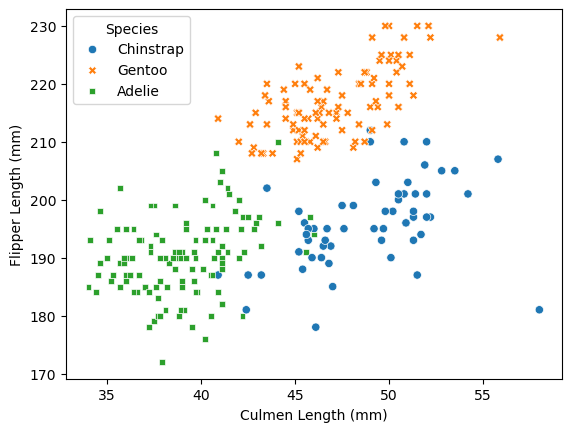

In [123]:
import seaborn as sns

df = train[["Culmen Length (mm)", "Flipper Length (mm)", "Species"]]
figure1 = sns.scatterplot(df, x = "Culmen Length (mm)", y = "Flipper Length (mm)", hue = "Species", style = "Species")

# Figure 2

I wanted to explore the relationship between Sex, Culmen Length, and Delta 15 N to examine potential differences between male and female penguins within the Chinstrap species. Specifically, I was curious to see if there were any notable patterns or trends in these two measurements that could vary by sex. By plotting Culmen Length (mm) against Delta 15 N, we can get a sense of how these two variables correlate and whether there are any distinguishing features between males and females of the Chinstrap species.

From the scatter plot, we observe that both males and females within the Chinstrap species show a similar spread across Delta 15 N, but with the females’ values slightly lower. The notable difference, however, is that females seem to have shorter Culmen Lengths compared to males, although there is slight overlap around 50–51 mm. There is also one noticeable outlier: a female Chinstrap with the highest Culmen Length of 58 mm.

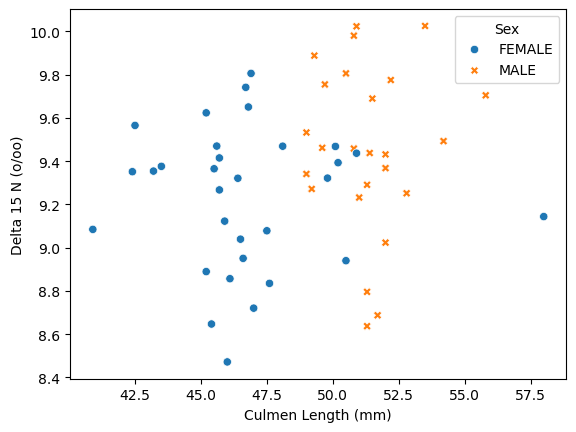

In [131]:
df = train[["Species", "Sex", "Culmen Length (mm)", "Delta 15 N (o/oo)"]]
filtered_df = df[df['Species'] == "Chinstrap"]
figure2 = sns.scatterplot(filtered_df, x = "Culmen Length (mm)", y = "Delta 15 N (o/oo)", hue = "Sex", style = "Sex")

# Plotting Decision Regions
Now ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍we ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍are ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍going ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍plot ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍panel ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍decision ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍regions ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍for ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍your ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍classifier. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍You ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍can ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍use ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍plot_regions ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍function ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍defined ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍below ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍plot ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍your ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍regions. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍This ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍function ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍assumes ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍that ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍your ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍first ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍two ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍columns ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍in ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍X_train ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍are ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍quantitative ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍that ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍columns ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍after ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍that ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍are ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍one-hot ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍qualitative ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍columns.

In [101]:
from matplotlib.patches import Patch
import numpy as np
from matplotlib import pyplot as plt

def plot_regions(model, X, y):
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, bbox_to_anchor=(1, 1))
      
      plt.tight_layout()


# Model Choice
I used combinations to experiment with all pairs of quantitative features and combined them with all categorical attributes like Sex, Clutch Completion, and Island. The goal was to identify the optimal feature combinations that would lead to the highest accuracy when trained on a Random Forest model.

Once the model was trained on each set of features, I assessed its accuracy on the test set. When I reached a perfect accuracy score of 100%, I plotted decision regions of the training data model and the test data model by calling the previous function to visualize the model's decision boundaries. I wanted to ensure that I understood how well the classifier was generalizing and how different feature combinations might affect the model's ability to classify penguins correctly. Additionally, I included confusion matrices to evaluate the classification results in more detail and to confirm that the model wasn't simply overfitting. 

I only print the decision region plots and confusion matrix of the first model that achieves max accuracy. I continue to count how many other combinations I can make that achieves max accuracy. This count is usually been between 3 and 5 and may vary due to the nature of the way random forest classifiers build the model. 

Training Set


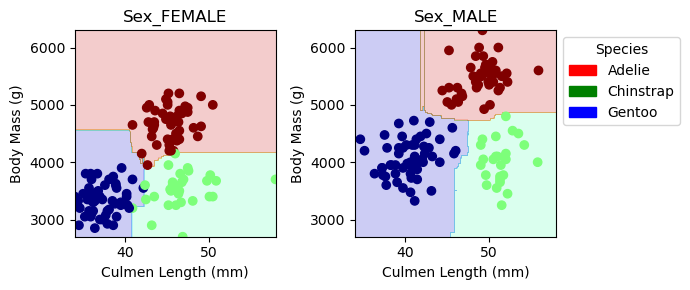

Test Set


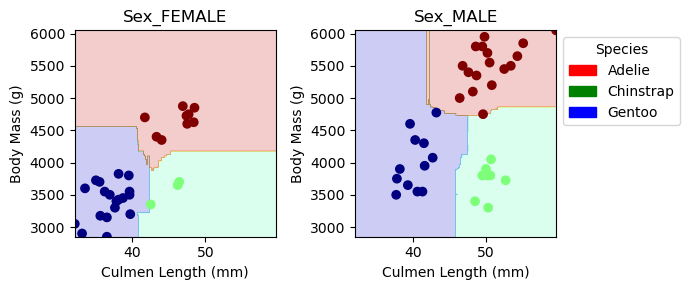

[[31  0  0]
 [ 0 11  0]
 [ 0  0 26]]

The total number of combinations for which 100% accuracy was achieved 3


In [133]:
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

all_qual_cols = ["Sex", "Clutch Completion", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
plotted = False
count = 1

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols =  list(pair) + qual_cols

    # train model and find best accuracy score  
    # columns for the model that has the best score. 
    rf = RandomForestClassifier()
    rf.fit(X_train[cols], y_train)
    score  = rf.score(X_test[cols], y_test) * 100

    if score == 100.0 and not plotted:
      print("Training Set")
      plot_regions(rf, X_train[cols], y_train)
      plt.show()
      
      print("Test Set")
      plot_regions(rf, X_test[cols], y_test)
      plt.show()

      y_pred = rf.predict(X_test[cols])
      C = confusion_matrix(y_test, y_pred)
      print(C)

      plotted = True
    
    elif score == 100.0:
      # print(cols)
      count += 1
    
print("\nThe total number of combinations for which 100% accuracy was achieved", count)


# Decision Region Plots

The first decision region graph for the Random Forest classifier displays the training data points, while the second shows the test data. It's clear that the decision boundaries for male and female individuals across different species vary. For example, the color-coded regions for female Gentoo penguins are limited to a body mass of 4500g and a culmen length of 41mm, while the male Gentoo penguins' regions extend up to a body mass of 6000g and a culmen length of 45mm, as indicated by the shaded blue areas. Similarly, the male Adelie penguins are confined to the upper right of the graph, while female Adelie penguins occupy the top half, as indicated by the shaded red regions. Female Chinstrap penguins show a larger range in culmen length, with a body mass limit of 4000g, while male Chinstrap penguins span a smaller range in culmen length but extend to a body mass of up to 4900g, as indicated by the shaded green regions.

When analyzing the decision boundary on the test data, it becomes evident how well the Random Forest classifier generalizes to unseen data. The decision regions for each species and sex remain consistent with the training data. Most of the test data points fit within their respective color-coded species regions, indicating that the model has learned the underlying patterns effectively. 

# Confusion Matrix

The confusion matrix clearly demonstrates the model’s 100% accuracy rate. By comparing the true labels with the labels predicted by the Random Forest classifier, it’s evident that the model made no false predictions. Every prediction aligns perfectly with the actual class, indicating that the model has successfully classified all test instances (31 Adelie, 11 Chinstrap, 26 Gentoo) without error.

# Discussion

In this analysis, I learned several key insights about both the dataset and machine learning model performance. Firstly, the data required careful preprocessing, such as encoding categorical variables and handling missing data, to ensure effective model training. Through the creation of summary statistics and visualization of relationships between different features, I observed notable patterns in the data, such as the strong separation between penguin species based on physical traits like flipper length and culmen length. The Random Forest classifier, when trained on optimal feature combinations, achieved an impressive 100% accuracy, demonstrating its effectiveness in classifying penguins based on the available data.

One of the most fascinating parts of this process was visualizing decision regions for both the training and test datasets. It does change slightly just beacuse of the randomization during the process.
The decision boundaries revealed how well the classifier learned to differentiate between species and sexes, with clear regions for each group, even for the test data that the model had not seen before.